<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120-4.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.881575,41.481536,98.216667,0.501317,200.081094,199.334818,0.746276
1,0.0,1.0,69.626185,57.539221,31.967629,-0.041285,169.091750,168.959530,0.132220
2,0.0,2.0,95.445545,89.394844,48.727885,-0.687608,242.880666,243.681410,-0.800744
3,0.0,3.0,96.816215,68.055104,51.428675,-0.602517,225.697477,226.198616,-0.501139
4,0.0,4.0,66.323705,87.527328,59.848340,-1.630764,222.068608,223.855610,-1.787002
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.027025,54.043092,59.890539,1.756315,181.716970,180.060006,1.656964
119996,999.0,116.0,56.704686,36.770736,37.841936,-0.720345,140.597014,141.378373,-0.781359
119997,999.0,117.0,82.986776,89.919605,21.222004,-1.114094,203.014290,204.388303,-1.374012
119998,999.0,118.0,87.778967,93.206203,64.620645,0.554977,256.160793,255.747690,0.413103


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    49.881575  41.481536  98.216667  ...  200.081094  199.334818  0.746276
      1.0    69.626185  57.539221  31.967629  ...  169.091750  168.959530  0.132220
      2.0    95.445545  89.394844  48.727885  ...  242.880666  243.681410 -0.800744
      3.0    96.816215  68.055104  51.428675  ...  225.697477  226.198616 -0.501139
      4.0    66.323705  87.527328  59.848340  ...  222.068608  223.855610 -1.787002
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.027025  54.043092  59.890539  ...  181.716970  180.060006  1.656964
      116.0  56.704686  36.770736  37.841936  ...  140.597014  141.378373 -0.781359
      117.0  82.986776  89.919605  21.222004  ...  203.014290  204.388303 -1.374012
      118.0  87.778967  93.206203  64.620645  ...  256.160793  255.747690  0.413103
      119.0  42.287921  88.966250  88.607218  ...  230.757640  230.139328  0.618312

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    49.881575  41.481536  98.216667  ...  200.081094  199.334818  0.746276
      1.0    69.626185  57.539221  31.967629  ...  169.091750  168.959530  0.132220
      2.0    95.445545  89.394844  48.727885  ...  242.880666  243.681410 -0.800744
      3.0    96.816215  68.055104  51.428675  ...  225.697477  226.198616 -0.501139
      4.0    66.323705  87.527328  59.848340  ...  222.068608  223.855610 -1.787002
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.027025  54.043092  59.890539  ...  181.716970  180.060006  1.656964
      116.0  56.704686  36.770736  37.841936  ...  140.597014  141.378373 -0.781359
      117.0  82.986776  89.919605  21.222004  ...  203.014290  204.388303 -1.374012
      118.0  87.778967  93.206203  64.620645  ...  256.160793  255.747690  0.413103
      119.0  42.287921  88.966250  88.607218  ...  230.757640  230.139328  0.618312

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.881575,41.481536,98.216667,0.501317,200.081094,199.334818,0.746276
1,0.0,1.0,69.626185,57.539221,31.967629,-0.041285,169.091750,168.959530,0.132220
2,0.0,2.0,95.445545,89.394844,48.727885,-0.687608,242.880666,243.681410,-0.800744
3,0.0,3.0,96.816215,68.055104,51.428675,-0.602517,225.697477,226.198616,-0.501139
4,0.0,4.0,66.323705,87.527328,59.848340,-1.630764,222.068608,223.855610,-1.787002
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.027025,54.043092,59.890539,1.756315,181.716970,180.060006,1.656964
119996,999.0,116.0,56.704686,36.770736,37.841936,-0.720345,140.597014,141.378373,-0.781359
119997,999.0,117.0,82.986776,89.919605,21.222004,-1.114094,203.014290,204.388303,-1.374012
119998,999.0,118.0,87.778967,93.206203,64.620645,0.554977,256.160793,255.747690,0.413103


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    49.881575  41.481536  98.216667  ...  200.081094  199.334818  0.746276
      1.0    69.626185  57.539221  31.967629  ...  169.091750  168.959530  0.132220
      2.0    95.445545  89.394844  48.727885  ...  242.880666  243.681410 -0.800744
      3.0    96.816215  68.055104  51.428675  ...  225.697477  226.198616 -0.501139
      4.0    66.323705  87.527328  59.848340  ...  222.068608  223.855610 -1.787002
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.027025  54.043092  59.890539  ...  181.716970  180.060006  1.656964
      116.0  56.704686  36.770736  37.841936  ...  140.597014  141.378373 -0.781359
      117.0  82.986776  89.919605  21.222004  ...  203.014290  204.388303 -1.374012
      118.0  87.778967  93.206203  64.620645  ...  256.160793  255.747690  0.413103
      119.0  42.287921  88.966250  88.607218  ...  230.757640  230.139328  0.618312

[120000 rows x 7 columns]

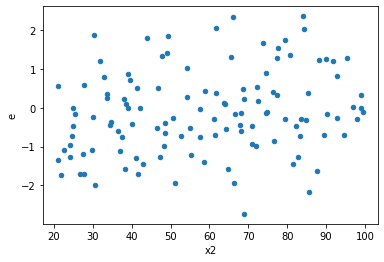

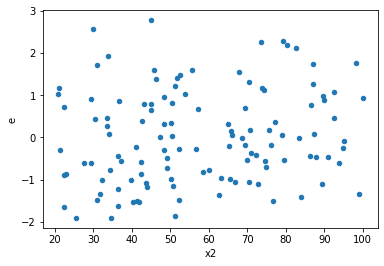

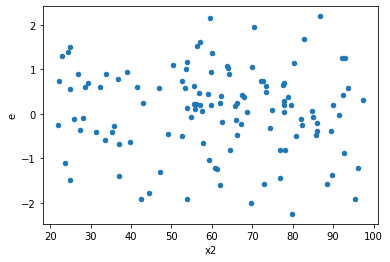

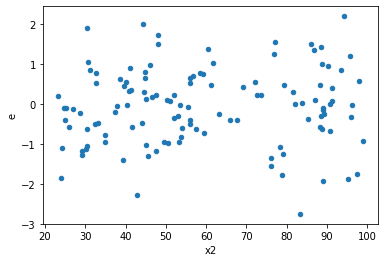

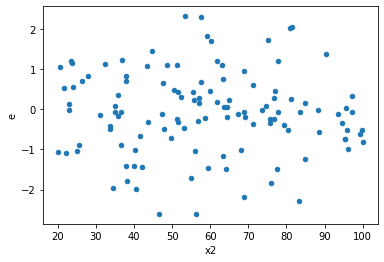

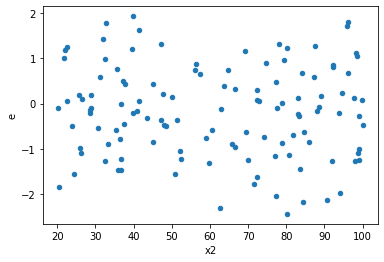

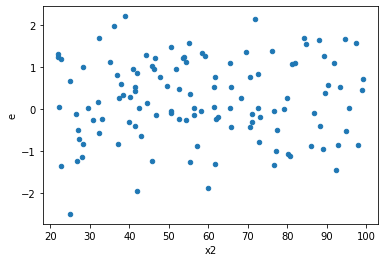

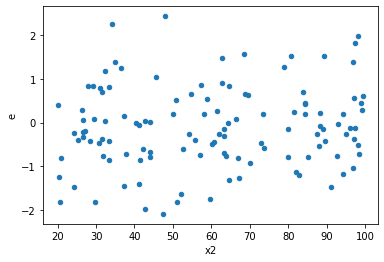

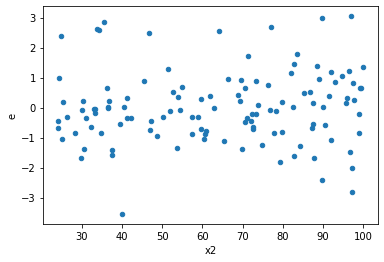

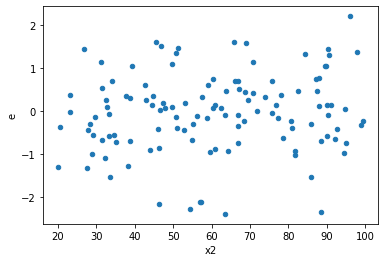

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,53.0,61.0,49.27891761556762,56.82212765899774,0.9297908984069363,0.9315102894917663,1.0018492233982672,0.9895044017553696,0.5052477991223152,0.4947522008776848,Reject001=1 : Homoscedasticity
3.0,61.0,53.0,42.623310037397786,58.94123989918083,0.6987427874983244,1.1120988660222797,1.5915711559669536,0.08558906189207183,0.9572054690539641,0.042794530946035914,Reject001=1 : Homoscedasticity
5.0,56.0,58.0,50.82582794064349,62.96221936942529,0.9076040703686338,1.0855555063694016,1.1960672520215678,0.5001503197712363,0.7499248401143819,0.2500751598856181,Reject001=1 : Homoscedasticity
7.0,54.0,60.0,45.09969318309573,53.51641279785475,0.8351795033906617,0.8919402132975791,1.0679622879590318,0.8013766004836076,0.5993116997581962,0.4006883002418038,Reject001=1 : Homoscedasticity
8.0,51.0,63.0,69.54901400300687,96.05914204984035,1.3637061569217035,1.5247482865054023,1.1180915175650592,0.6691858574049834,0.6654070712975083,0.3345929287024917,Reject001=1 : Homoscedasticity
9.0,57.0,57.0,44.47896522575294,51.572297515221784,0.7803327232588234,0.9047771493898559,1.1594761086159862,0.5782987888405715,0.7108506055797142,0.28914939442028575,Reject001=1 : Homoscedasticity
10.0,75.0,39.0,59.48135327159925,43.73570429685902,0.79308471028799,1.1214283153040774,1.414008239922892,0.2375963295278427,0.8812018352360786,0.11879816476392135,Reject001=1 : Homoscedasticity
15.0,57.0,57.0,51.10299134659203,64.83013817596152,0.8965437078349479,1.1373708451923075,1.2686172857527829,0.3717609229833354,0.8141195385083323,0.1858804614916677,Reject001=1 : Homoscedasticity
20.0,64.0,50.0,76.50679077570288,60.106665550067,1.1954186058703575,1.20213331100134,1.005617032475493,0.9920736489604234,0.5039631755197883,0.4960368244802117,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,58.0,75.88515295761502,47.647182042371476,1.3550920171002683,0.8215031386615772,0.6062342101457389,0.0619199062913206,Reject001=1 : Homoscedasticity
1.0,58.0,56.0,82.06021139846119,45.497598138111655,1.4148312310079516,0.8124571096091368,0.5742431265320087,0.03787083564876106,Reject001=1 : Homoscedasticity
2.0,53.0,61.0,49.27891761556762,56.82212765899774,0.9297908984069363,0.9315102894917663,1.0018492233982672,0.9895044017553696,Reject001=1 : Homoscedasticity
3.0,61.0,53.0,42.623310037397786,58.94123989918083,0.6987427874983244,1.1120988660222797,1.5915711559669536,0.08558906189207183,Reject001=1 : Homoscedasticity
4.0,69.0,45.0,74.04124302094917,43.76446044996187,1.0730614930572344,0.9725435655547081,0.9063260324288192,0.7027655672380831,Reject001=1 : Homoscedasticity
5.0,56.0,58.0,50.82582794064349,62.96221936942529,0.9076040703686338,1.0855555063694016,1.1960672520215678,0.5001503197712363,Reject001=1 : Homoscedasticity
6.0,57.0,57.0,58.95025574185471,45.11382885155045,1.034215013014995,0.7914706816061483,0.7652863975536515,0.3154246731429926,Reject001=1 : Homoscedasticity
7.0,54.0,60.0,45.09969318309573,53.51641279785475,0.8351795033906617,0.8919402132975791,1.0679622879590318,0.8013766004836076,Reject001=1 : Homoscedasticity
8.0,51.0,63.0,69.54901400300687,96.05914204984035,1.3637061569217035,1.5247482865054023,1.1180915175650592,0.6691858574049834,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      993
Reject001=0 : Heteroscedasticity      7
Name: Result_test, dtype: int64